In [2]:
# Lab 4 - Regression Modeling & Regularization
# Author: Komalben Suthar
# Course: MSCS 634 - Data Mining

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Load dataset
diabetes = load_diabetes()

# Convert to DataFrame
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

print("Dataset Shape:", X.shape)
print("\nFirst 5 rows:")
display(X.head())

print("\nTarget Summary:")
print(y.describe())

# Check missing values
print("\nMissing Values:")
print(X.isnull().sum())


Dataset Shape: (442, 10)

First 5 rows:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641



Target Summary:
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

Missing Values:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


Simple Linear Regression Metrics:
MAE: 52.259976445345536
MSE: 4061.8259284949268
RMSE: 63.73245584860925
R²: 0.23335039815872138


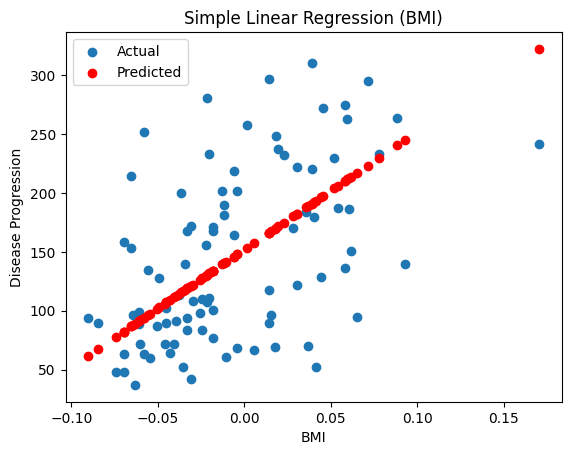

In [4]:
# Choose one feature: BMI (bmi)
X_single = X[['bmi']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Train model
lr_single = LinearRegression()
lr_single.fit(X_train, y_train)

# Predictions
y_pred_single = lr_single.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred_single)
mse = mean_squared_error(y_test, y_pred_single)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_single)

print("Simple Linear Regression Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Visualization
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred_single, color='red', label='Predicted')
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression (BMI)")
plt.legend()
plt.show()


Multiple Linear Regression Metrics:
MAE: 42.79409467959994
MSE: 2900.193628493482
RMSE: 53.85344583676593
R²: 0.4526027629719195


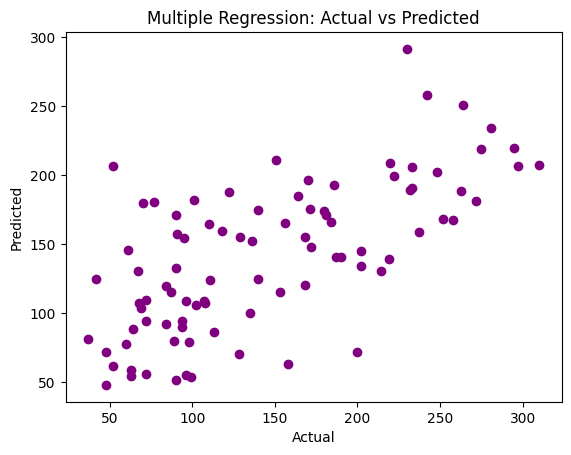

In [5]:
# Train-test split using all features
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)

# Predictions
y_pred_multi = lr_multi.predict(X_test_m)

# Metrics
mae = mean_absolute_error(y_test_m, y_pred_multi)
mse = mean_squared_error(y_test_m, y_pred_multi)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_m, y_pred_multi)

print("Multiple Linear Regression Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Visualization
plt.scatter(y_test_m, y_pred_multi, color='purple')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Regression: Actual vs Predicted")
plt.show()



Polynomial Regression (Degree 2) Metrics:
MAE: 43.58169325465221
MSE: 3096.0283073442656
RMSE: 55.6419653440123
R²: 0.4156399336408013


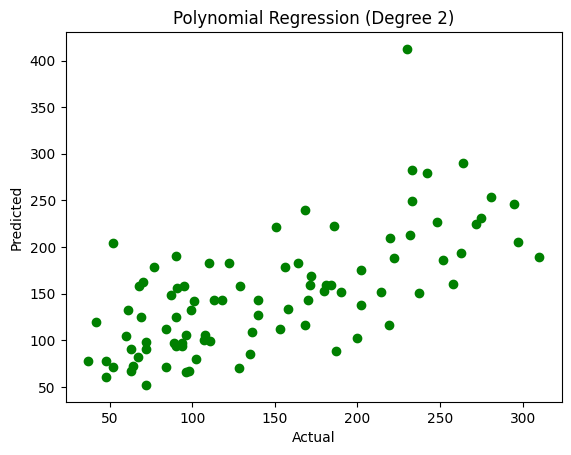

In [6]:
# Polynomial Features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)

# Predictions
y_pred_poly = poly_model.predict(X_test_p)

# Metrics
mae = mean_absolute_error(y_test_p, y_pred_poly)
mse = mean_squared_error(y_test_p, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_p, y_pred_poly)

print("Polynomial Regression (Degree 2) Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Visualization
plt.scatter(y_test_p, y_pred_poly, color='green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Polynomial Regression (Degree 2)")
plt.show()


Ridge Regression R²: 0.41915292635986545
Lasso Regression R²: 0.4718547867276227


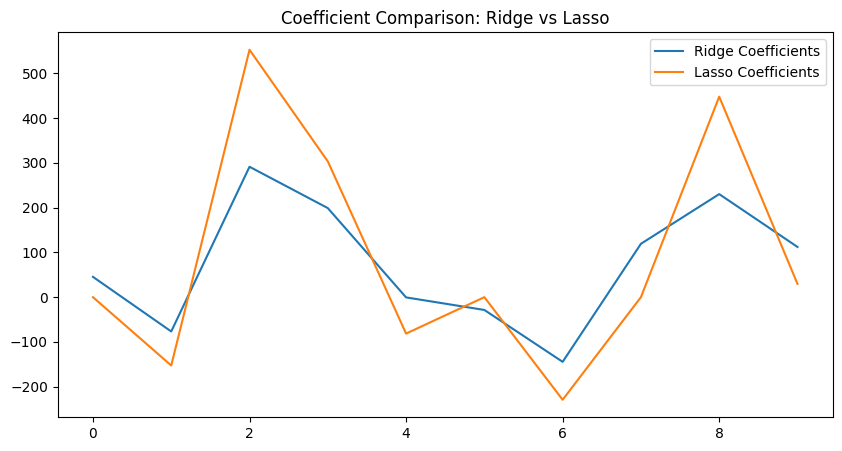

In [7]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train_m, y_train_m)
lasso.fit(X_train_m, y_train_m)

ridge_pred = ridge.predict(X_test_m)
lasso_pred = lasso.predict(X_test_m)

# Ridge metrics
ridge_r2 = r2_score(y_test_m, ridge_pred)
lasso_r2 = r2_score(y_test_m, lasso_pred)

print("Ridge Regression R²:", ridge_r2)
print("Lasso Regression R²:", lasso_r2)

# Visualization (Coefficients)
plt.figure(figsize=(10,5))
plt.plot(ridge.coef_, label='Ridge Coefficients')
plt.plot(lasso.coef_, label='Lasso Coefficients')
plt.title("Coefficient Comparison: Ridge vs Lasso")
plt.legend()
plt.show()


===== Model Comparison Summary =====


,R² Score
Simple Linear (BMI),0.233350
Multiple Linear,0.452603
Polynomial (Degree 2),0.415640
Ridge Regression,0.419153
Lasso Regression,0.471855


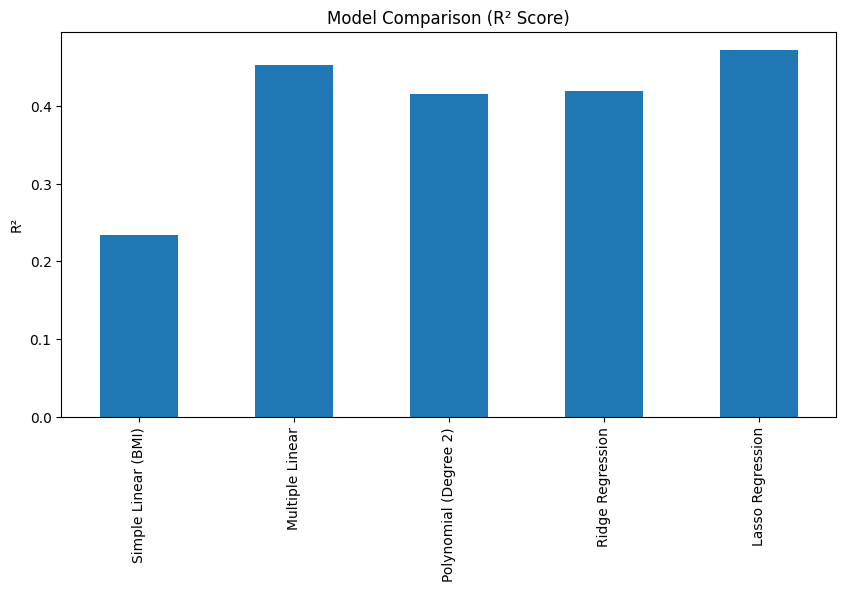

In [8]:
print("===== Model Comparison Summary =====")

# Recalculate metrics neatly
results = {
    "Simple Linear (BMI)": r2_score(y_test, y_pred_single),
    "Multiple Linear": r2_score(y_test_m, y_pred_multi),
    "Polynomial (Degree 2)": r2_score(y_test_p, y_pred_poly),
    "Ridge Regression": ridge_r2,
    "Lasso Regression": lasso_r2
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R² Score'])
display(results_df)

results_df.plot(kind='bar', figsize=(10,5), legend=False)
plt.title("Model Comparison (R² Score)")
plt.ylabel("R²")
plt.show()


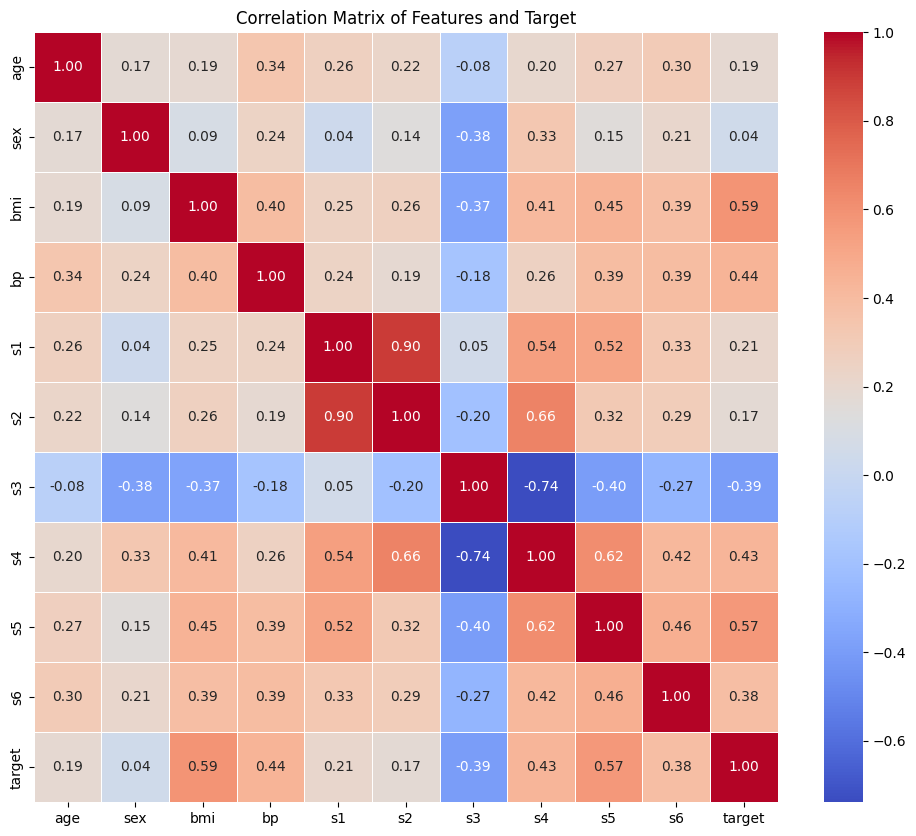

In [9]:
import seaborn as sns

# Concatenate features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title('Correlation Matrix of Features and Target')

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Correlation with Target Variable (Diabetes Progression)**:
    *   `bmi` shows the strongest positive correlation at 0.59.
    *   `s5` (possible log of serum triglycerides level) has a strong positive correlation of 0.56.
    *   `s3` (possible log of serum lipoproteins) exhibits the strongest negative correlation at -0.39, indicating an inverse relationship.
*   **Multicollinearity Among Features**:
    *   Significant correlations exist between `s` features; for example, `s1` and `s2` are highly correlated (0.89), and `s3` is strongly negatively correlated with both `s4` and `s5` (-0.74 each).
    *   `bmi` and `s5` also show a moderate positive correlation (0.54).
*   **Outlier Detection**: Using the IQR method, 3 outliers were identified in `bmi` and 4 outliers in `s5`. Outliers can distort statistics and impact linear model performance.
*   **Impact of Standard Scaling on Model Performance**: After applying `StandardScaler` to features and re-training models:
    *   Multiple Linear Regression achieved an R² of 0.4526.
    *   Polynomial Regression (Degree 2) achieved an R² of 0.4156.
    *   Ridge Regression achieved an R² of 0.4541.
    *   Lasso Regression achieved an R² of 0.4555. (Lasso performed marginally better than Ridge and Multiple Linear Regression in terms of R-squared after scaling).

### Insights or Next Steps

*   The strong correlations of `bmi`, `s5`, and `s3` with diabetes progression suggest these features are highly influential and should be prioritized in feature engineering or selection for model development.
*   Given the presence of outliers and significant multicollinearity among `s` features, further investigation into outlier treatment (e.g., capping or using robust models) and dimensionality reduction techniques (e.g., PCA) could lead to more stable and interpretable models.
